# Exploratory Data Analysis on Global Terorrsism 

## Made by: Shrey Soni

## Sparks Foundation #GRIPMAY21

## Task #4

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [35]:
df= pd.read_csv('globalterrorismdb_0718dist.csv',encoding= 'ISO-8859-1')

In [36]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [37]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Filtering down and renaming the columns that are required in the EDA

In [38]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary','attacktype1_txt':'AttackType','targtype1_txt':'Target','gname':'Group','motive':'Motive','weaptype1_txt':'WeaponType','nkill':'Killed','nwound':'Wounded'},inplace=True)

In [39]:
df= df[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Target','Group','Motive','WeaponType','Killed','Wounded','Summary']]

In [40]:
#New Data

df.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Target,Group,Motive,WeaponType,Killed,Wounded,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [41]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Target             0
Group              0
Motive        131130
WeaponType         0
Killed         10313
Wounded        16311
Summary        66129
dtype: int64

In [42]:
df['City']= df['City'].fillna(0)
df['Latitude']= df['Latitude'].fillna(0)
df['Longitude']= df['Longitude'].fillna(0)
df['Motive']= df['Motive'].fillna(0)
df['Killed']= df['Killed'].fillna(0)
df['Wounded']= df['Wounded'].fillna(0)
df['Summary']= df['Summary'].fillna(0)

In [43]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,22.909109,-4.471911e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.699442,2.021946e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,9.518645,1.231572e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.126646,4.314357e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.538560,6.835734e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   Region      181691 non-null  object 
 5   City        181691 non-null  object 
 6   Latitude    181691 non-null  float64
 7   Longitude   181691 non-null  float64
 8   AttackType  181691 non-null  object 
 9   Target      181691 non-null  object 
 10  Group       181691 non-null  object 
 11  Motive      181691 non-null  object 
 12  WeaponType  181691 non-null  object 
 13  Killed      181691 non-null  float64
 14  Wounded     181691 non-null  float64
 15  Summary     181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


## Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2c807358>,
      dtype=object)

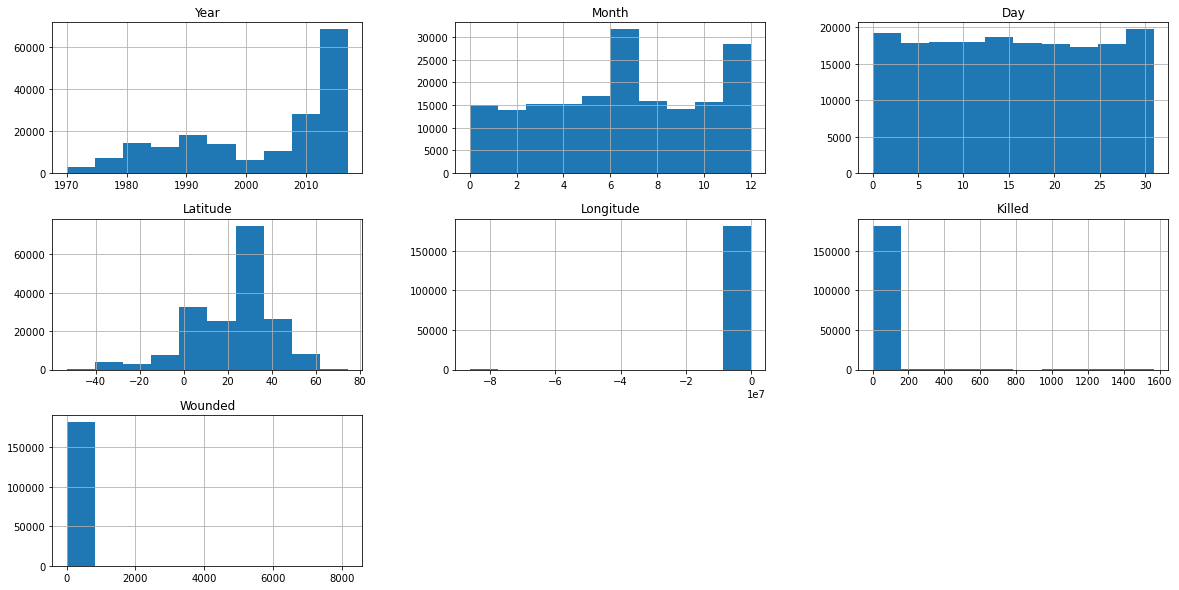

In [45]:
df.hist(figsize=(20,10))  #shows the distribution of data in each column

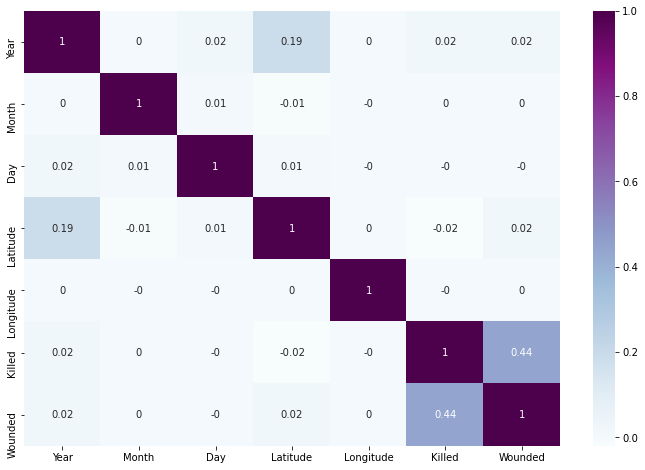

In [46]:
#Corelation Analysis

plt.figure(figsize=(12,8))
sns.heatmap(np.round(df.corr(),2),annot=True, cmap='BuPu')

## Year, Month and Days with most Terrorist Activities

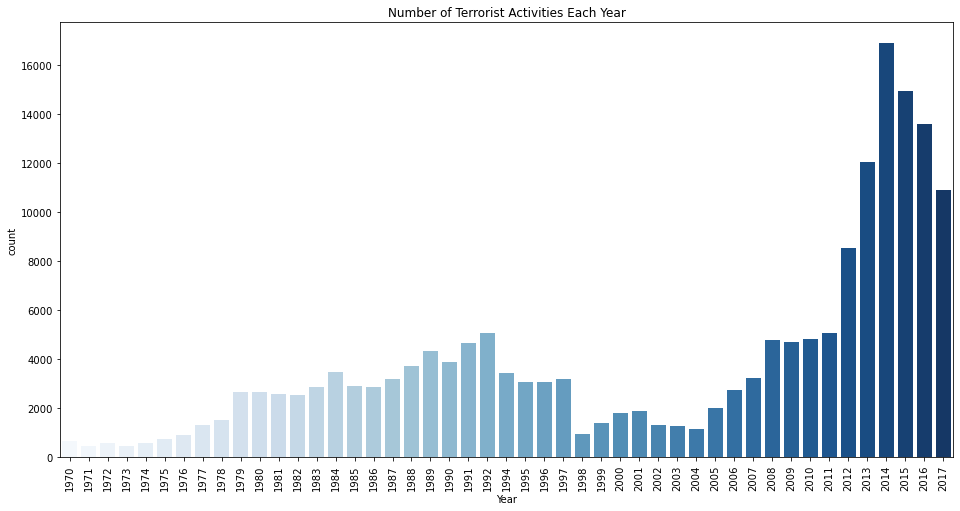

In [47]:
#Year

plt.subplots(figsize=(16,8))
sns.countplot('Year',data=df,palette='Blues')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

### Most of the attacks tooks place in 2014

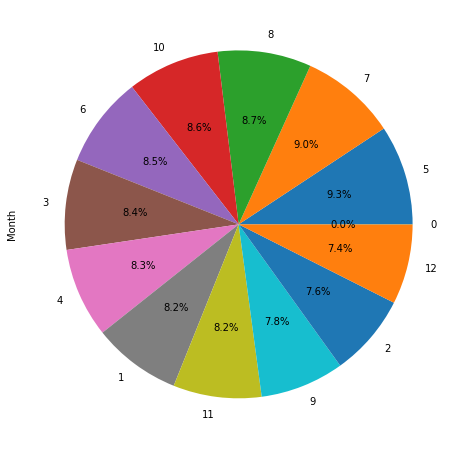

In [48]:
#Month

plt.figure(figsize=(8,8))
df['Month'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

### Most of the attacks took place in May and least in December

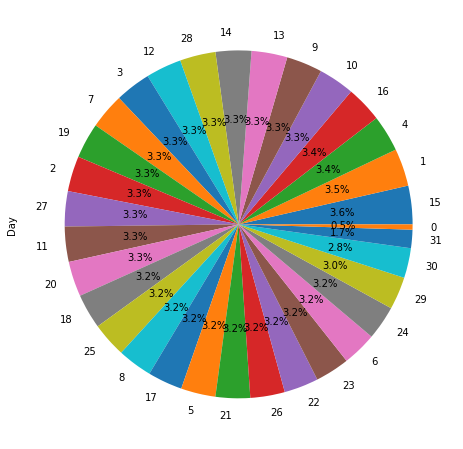

In [49]:
#Day

plt.figure(figsize=(8,8))
df['Day'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

### Most of the attacks took place on 15th and least on 31st

## Terrorist Activities by Region in Each Year 

In [50]:
print("Region with most Terroist Activities:\n",df['Region'].value_counts().head())

Region with most Terroist Activities:
 Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64


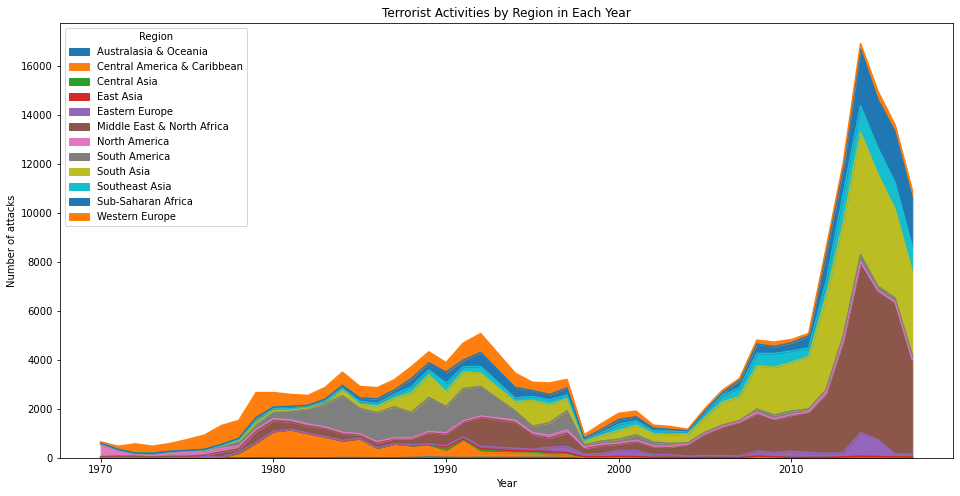

In [51]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(16,8))
plt.title('Terrorist Activities by Region in Each Year')
plt.ylabel('Number of attacks')
plt.show()

## Terrorist Activites in Different Countries

In [52]:
print("Countries with most Terroist Activities:\n",df['Country'].value_counts().head())

Countries with most Terroist Activities:
 Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64


In [53]:
import plotly.express as px
terr= df.groupby(['Country'],as_index=False).count()
fig= px.choropleth(terr, locations='Country',locationmode= 'country names', color='Year',hover_name='Country',
                   projection='orthographic',title='Terror Attacks (1970-2017)',
                   labels={'Year':'Attacks'})
fig.show()

plt.figure(figsize=(16,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_r')
plt.title('Top Countries Afftected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Terrorist Activites in Different Cities

In [54]:
print("Cities with most Terroist Activities:\n",df['City'].value_counts().head())

print("\nCity with most Terroist Activities:",df['City'].value_counts().index[1])

Cities with most Terroist Activities:
 Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: City, dtype: int64

City with most Terroist Activities: Baghdad


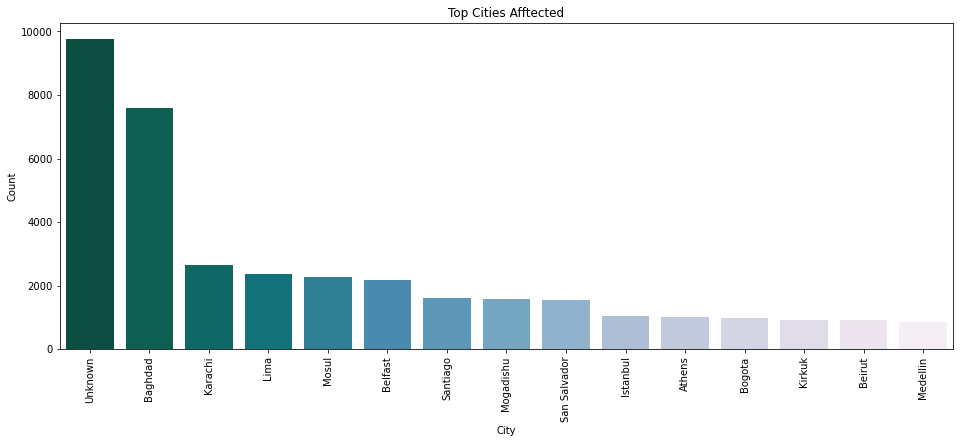

In [55]:
plt.figure(figsize=(16,6))
sns.barplot(df['City'].value_counts()[:15].index,df['City'].value_counts()[:15].values,palette='PuBuGn_r')
plt.title('Top Cities Afftected')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Total number of casualties in Each Year

In [56]:
df['Wounded']= df['Wounded'].astype(int)
df['Killed']= df['Killed'].astype(int)
df['Casualties']= df['Killed'] + df['Wounded']

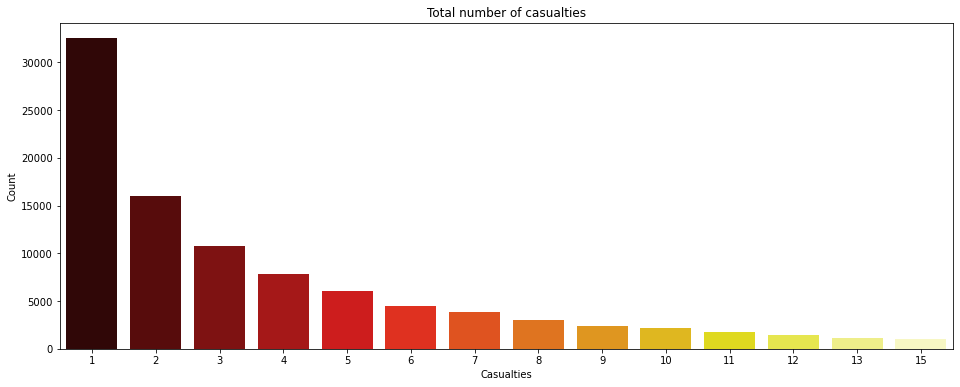

In [57]:
plt.subplots(figsize=(16,6))
sns.barplot(df['Casualties'].value_counts()[1:15].index,df['Casualties'].value_counts()[1:15].values,
            palette='hot')
plt.title('Total number of casualties')
plt.xlabel('Casualties')
plt.ylabel('Count')
plt.show()

## Killed vs Wounded Visualization

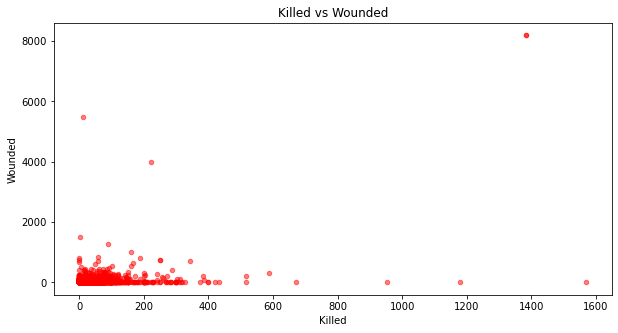

In [58]:
df.plot(kind='scatter',x='Killed',y='Wounded',alpha=0.5,color='red',figsize=(10,5))
plt.title('Killed vs Wounded')
plt.xlabel('Killed')
plt.ylabel('Wounded')
plt.show()

## Method of Attack

Most frequent methods of attack are:
 Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: AttackType, dtype: int64


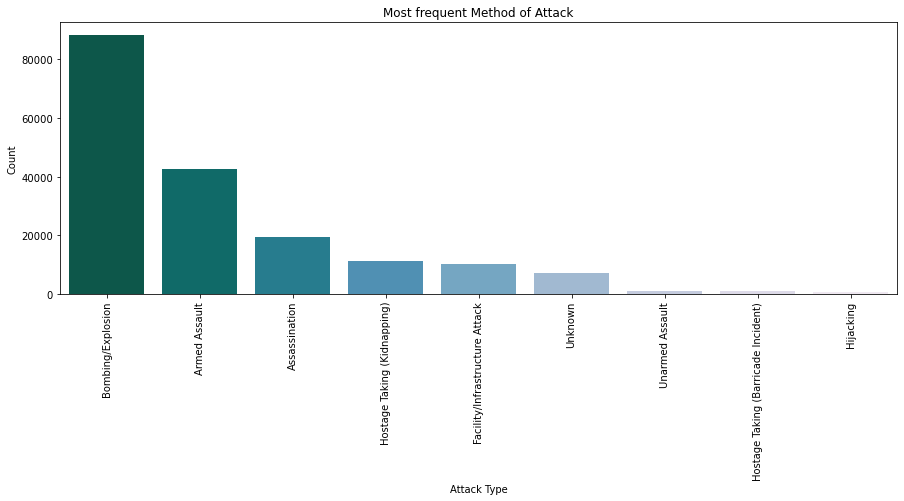

In [59]:
print('Most frequent methods of attack are:\n',df['AttackType'].value_counts()[:15].head())

plt.figure(figsize=(15,5))
sns.barplot(df['AttackType'].value_counts()[:15].index,df['AttackType'].value_counts()[:15].values,palette='PuBuGn_r')
plt.title('Most frequent Method of Attack')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Most Active Organizations 

Most active organizations:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


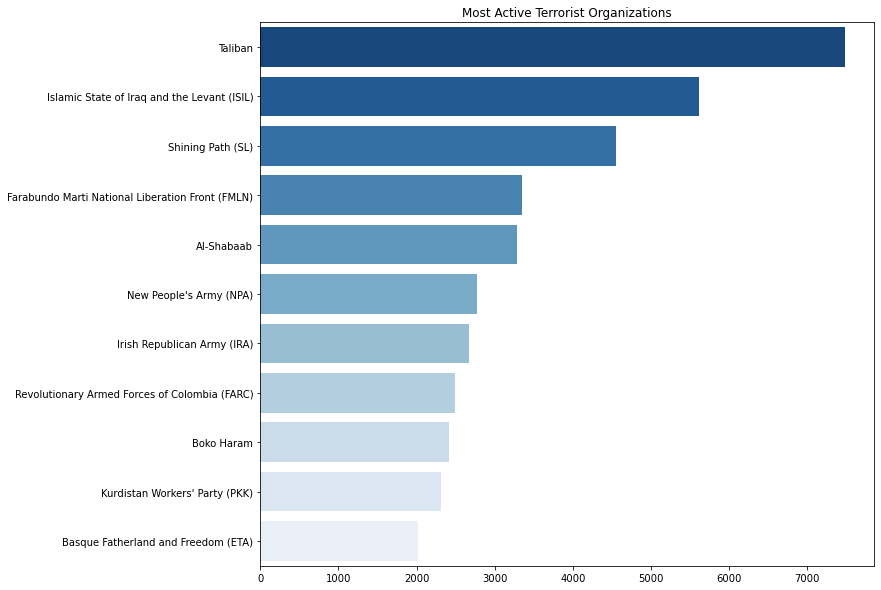

In [60]:
print('Most active organizations:\n',df['Group'].value_counts().head())

plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,palette='Blues_r')
plt.title('Most Active Terrorist Organizations')
#plt.xticks(rotation=90)
plt.show()

## Type of Weapons Used

Type of Weapons Used:
 Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: WeaponType, dtype: int64


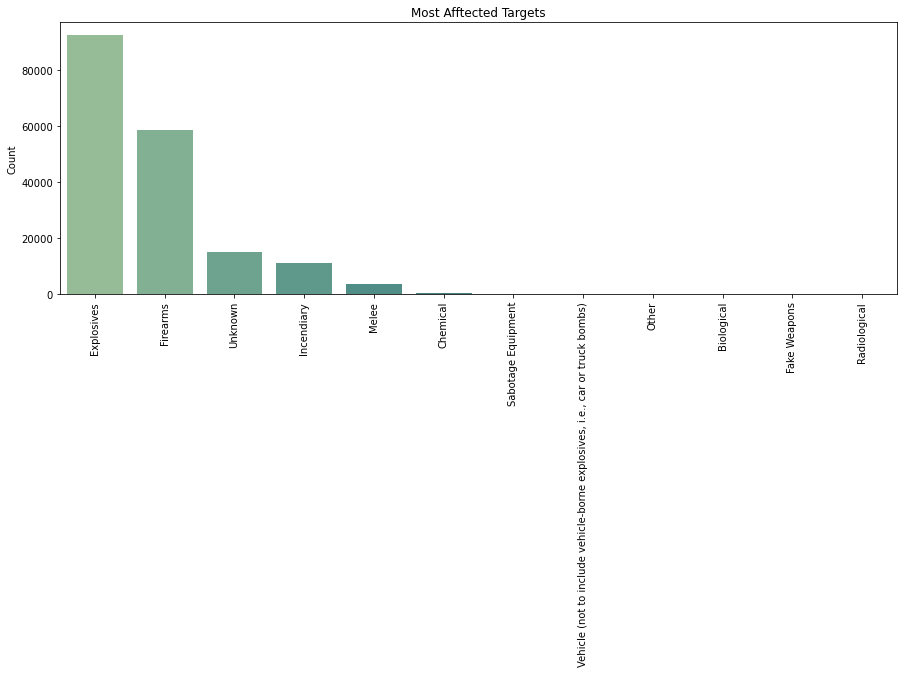

In [61]:
print('Type of Weapons Used:\n',df['WeaponType'].value_counts().head())

plt.figure(figsize=(15,5))
sns.barplot(df['WeaponType'].value_counts()[:15].index,df['WeaponType'].value_counts()[:15].values,palette='crest')
plt.title('Most Afftected Targets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Most Affected Targets

Most affected targets:
 Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: Target, dtype: int64


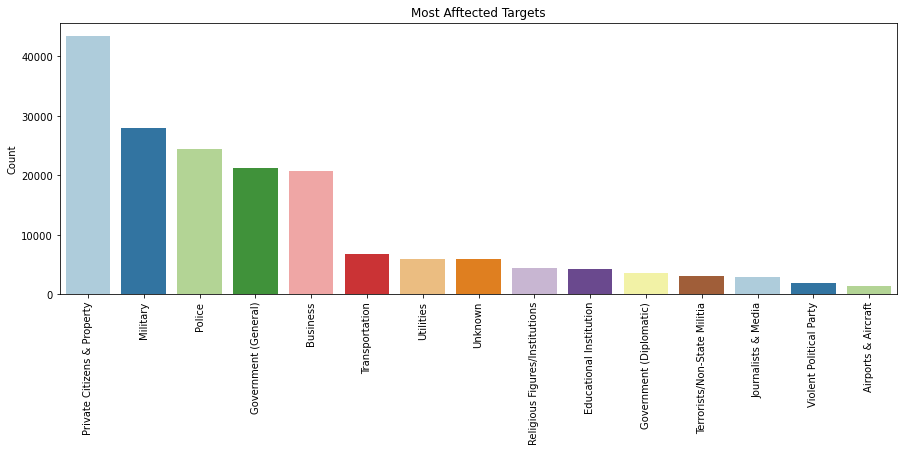

In [62]:
print('Most affected targets:\n',df['Target'].value_counts().head())

plt.figure(figsize=(15,5))
sns.barplot(df['Target'].value_counts()[:15].index,df['Target'].value_counts()[:15].values,palette='Paired')
plt.title('Most Afftected Targets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Result

### 1. Years with most attacks: 2014 (over 160,000), and 2015 (around 150,000)
### 2. Month with the most attacks: May
### 3. Date with the most attacks: 15th
### 4. Regions with most attacks: Middle East & North Africa and South Asia
### 5. Top 5 countries with most attacks: Iraq, Pakistan, Afghanistan, India and Columbia
### 6. Top 5 cities with most attacks: Baghdad, Karachi, Lima, Mosul and Belfast
### 7. We could see, in the attacks most often one, two or none were killed
### 8. Most often used attack types were: Bombing/Explosives, Armed Assualts and Assassinations 
### 9. Top 3 terrorist groups: Taliban, Islamic State of Iraq and the Levant (ISIL) and Shining Path
### 10. Most affected targets: Private Citizens & Property, Military and Police